In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [3]:
# The standard k-means algorithm isn't directly applicable to
# categorical data, for various reasons. The sample space for
# categorical data is discrete, and doesn't have a natural origin.
# A Euclidean distance function on such a space isn't really
# meaningful.

# So, we shall try to make intuitive conclusions
# using inertia and number of clusters formed while comparing
# with numerical data like Humidity and Temperature.

# Problem 1 - part 1
dataset = pd.read_excel("play.xlsx")
dataset.head()

,Outlook,Temperature,Humidity,Windy,Decision
0,overcast,72,90,strong,play
1,overcast,83,78,weak,play
2,overcast,64,65,strong,play
3,overcast,81,75,weak,play
4,sunny,75,70,strong,play


In [4]:
# one hot encoding
onehot_encoder = OneHotEncoder(handle_unknown='ignore')

# label encoder
label_encoder = LabelEncoder()

In [5]:
# outlook
print('Outlook: ', dataset['Outlook'].nunique())
dataset['Outlook'] = label_encoder.fit_transform(dataset['Outlook'])

# Windy
print('Windy: ', dataset['Windy'].nunique())
dataset['Windy'] = label_encoder.fit_transform(dataset['Windy'])

# Decision
print('Decision: ', dataset['Decision'].nunique())
dataset['Decision'] = label_encoder.fit_transform(dataset['Decision'])

dataset.describe()

Outlook:  3
Windy:  2
Decision:  2


,Outlook,Temperature,Humidity,Windy,Decision
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1.071429,73.571429,80.285714,0.571429,0.642857
std,0.828742,6.571667,9.840486,0.513553,0.497245
min,0.000000,64.000000,65.000000,0.000000,0.000000
25%,0.250000,69.250000,71.250000,0.000000,0.000000
50%,1.000000,72.000000,80.000000,1.000000,1.000000
75%,2.000000,78.750000,88.750000,1.000000,1.000000
max,2.000000,85.000000,96.000000,1.000000,1.000000


AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      14 non-null     int32
 1   Temperature  14 non-null     int64
 2   Humidity     14 non-null     int64
 3   Windy        14 non-null     int32
 4   Decision     14 non-null     int32
dtypes: int32(3), int64(2)
memory usage: 520.0 bytes
None


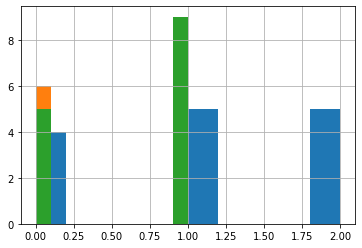

In [6]:
print(dataset['Outlook'].hist())
print(dataset['Windy'].hist())
print(dataset['Decision'].hist())

print(dataset.info())

In [7]:
print("Outlook \n", dataset['Outlook'].value_counts(normalize=True), '\n')
print("Windy \n", dataset['Windy'].value_counts(normalize=True), '\n')
print("Decision \n", dataset['Decision'].value_counts(normalize=True), '\n')

Outlook 
 2    0.357143
1    0.357143
0    0.285714
Name: Outlook, dtype: float64 

Windy 
 1    0.571429
0    0.428571
Name: Windy, dtype: float64 

Decision 
 1    0.642857
0    0.357143
Name: Decision, dtype: float64 



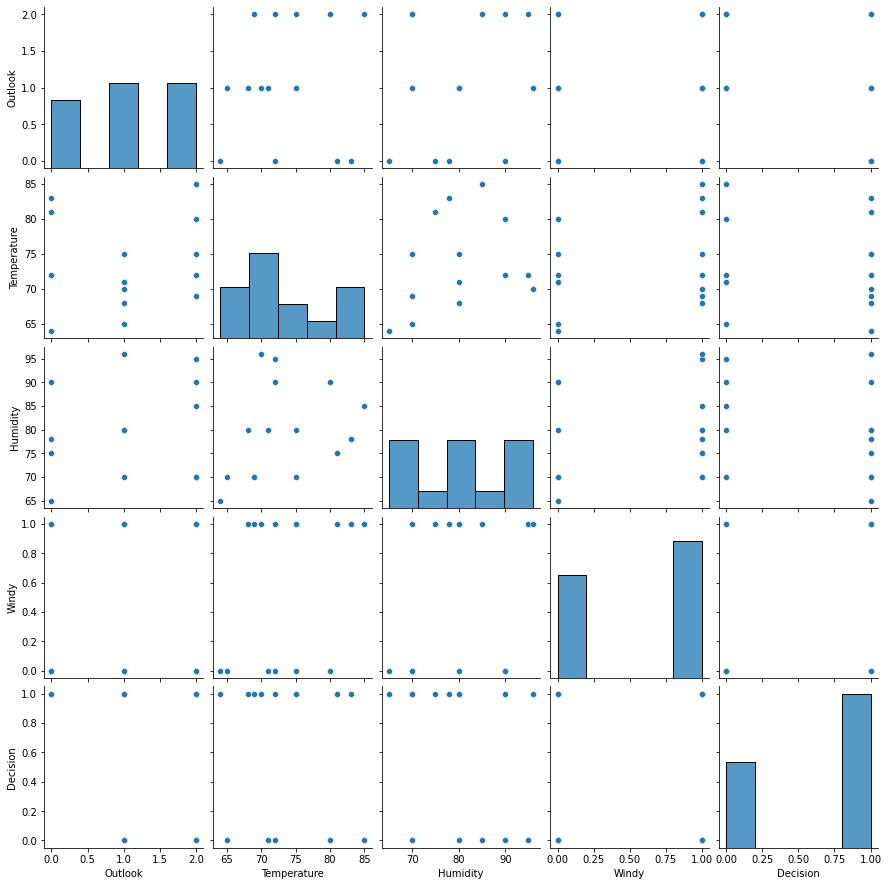

In [8]:
sns.pairplot(dataset)

In [45]:
# A good model is one with low inertia AND a
# low number of clusters ( K ).

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(dataset)
	kmeanModel.fit(dataset)

	distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / dataset.shape[0])
	inertias.append(kmeanModel.inertia_)
	mapping1[k] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dataset.shape[0]
	mapping2[k] = kmeanModel.inertia_


In [47]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 10.510987241034053
2 : 7.451652713435956
3 : 5.500347789378358
4 : 4.074937753493354
5 : 3.2529545146144647
6 : 2.77047397150818
7 : 2.260371940897976
8 : 1.7592743545489244
9 : 1.3338249055947442


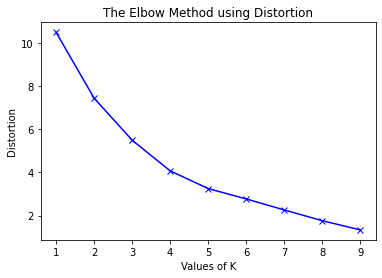

In [48]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [49]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 1835.857142857143
2 : 869.4222222222223
3 : 481.33333333333337
4 : 282.25
5 : 182.41666666666669
6 : 117.16666666666666
7 : 91.66666666666666
8 : 68.66666666666667
9 : 45.5


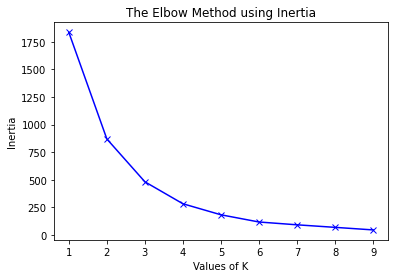

In [53]:

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [ ]:
# from values of inertia, we can make an intuitive conclusion
# that Total of 6 clusters is an optimum value.